In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler# for scaling 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,precision_score,confusion_matrix,mean_absolute_error,mean_squared_error
%matplotlib inline

In [2]:
data=pd.read_csv("lionking_Sentimentreviews.csv")

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,user,userid,review_text,createDate,updateDate,rating,Sentiment
0,0,0,Keyla H,c6f920f0-995c-4a71-958c-3b1611c5b3a8,"Lacked emotion, couldnt get past the change in...",2019-08-29,2019-08-29,2.5,Bad
1,1,1,Nancy,1373e0f7-8d4c-45fa-8ee7-f194be09ac6e,Loved it. Same story line but loved the update...,2019-08-29,2019-08-29,5.0,Good
2,2,2,Heather M,870637390,I'm conflicted about this one because I LOVE t...,2019-08-29,2019-08-29,3.0,Good
3,3,3,Audra,783B75C3-30ED-4A99-BBB9-3AE6A47C1B71,"Beautifully done movie, staying true to the or...",2019-08-29,2019-08-29,4.0,Good
4,4,4,Vivian B,822503571,"It's the lion king all right, with a new coat ...",2019-08-29,2019-08-29,1.5,Bad


In [4]:
#creating Sentiment based on rating 
data["Sentiment"] = data["rating"].apply(lambda x: 1 if x < 3 else 0)

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,user,userid,review_text,createDate,updateDate,rating,Sentiment
0,0,0,Keyla H,c6f920f0-995c-4a71-958c-3b1611c5b3a8,"Lacked emotion, couldnt get past the change in...",2019-08-29,2019-08-29,2.5,1
1,1,1,Nancy,1373e0f7-8d4c-45fa-8ee7-f194be09ac6e,Loved it. Same story line but loved the update...,2019-08-29,2019-08-29,5.0,0
2,2,2,Heather M,870637390,I'm conflicted about this one because I LOVE t...,2019-08-29,2019-08-29,3.0,0
3,3,3,Audra,783B75C3-30ED-4A99-BBB9-3AE6A47C1B71,"Beautifully done movie, staying true to the or...",2019-08-29,2019-08-29,4.0,0
4,4,4,Vivian B,822503571,"It's the lion king all right, with a new coat ...",2019-08-29,2019-08-29,1.5,1


In [6]:
data.shape

(3000, 9)

In [7]:
data.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
user            138
userid            0
review_text       0
createDate        0
updateDate        0
rating            0
Sentiment         0
dtype: int64

In [8]:
data.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
user             object
userid           object
review_text      object
createDate       object
updateDate       object
rating          float64
Sentiment         int64
dtype: object

In [9]:
data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [10]:
data["Sentiment"].value_counts()

0    2473
1     527
Name: Sentiment, dtype: int64

In [11]:
#dropping null values 
new_data = data.dropna(axis = 0, how ='any')

In [12]:
new_data["Sentiment"].value_counts()

0    2380
1     482
Name: Sentiment, dtype: int64

In [13]:
print("Old data frame length:", len(data), "\nNew data frame length:",  
       len(new_data), "\nNumber of rows with at least 1 NA value: ", 
       (len(data)-len(new_data))) 

Old data frame length: 3000 
New data frame length: 2862 
Number of rows with at least 1 NA value:  138


In [14]:
#creating num_words in a review column 
data["num_words"] = data['review_text'].str.split().str.len()

In [15]:
data.head()

,user,userid,review_text,createDate,updateDate,rating,Sentiment,num_words
0,Keyla H,c6f920f0-995c-4a71-958c-3b1611c5b3a8,"Lacked emotion, couldnt get past the change in...",2019-08-29,2019-08-29,2.5,1,11
1,Nancy,1373e0f7-8d4c-45fa-8ee7-f194be09ac6e,Loved it. Same story line but loved the update...,2019-08-29,2019-08-29,5.0,0,11
2,Heather M,870637390,I'm conflicted about this one because I LOVE t...,2019-08-29,2019-08-29,3.0,0,79
3,Audra,783B75C3-30ED-4A99-BBB9-3AE6A47C1B71,"Beautifully done movie, staying true to the or...",2019-08-29,2019-08-29,4.0,0,24
4,Vivian B,822503571,"It's the lion king all right, with a new coat ...",2019-08-29,2019-08-29,1.5,1,109


In [16]:
data.dtypes

user            object
userid          object
review_text     object
createDate      object
updateDate      object
rating         float64
Sentiment        int64
num_words        int64
dtype: object

In [17]:
data['Sentiment']=data['Sentiment'].astype("category")

In [18]:
#date has time info too which we dont require  so extracting only date 

In [19]:
data['createDate'] = pd.to_datetime(data['createDate']).dt.date
data['createDate'] = pd.to_datetime(data['createDate'],format = "%Y/%m/%d")

In [20]:
data_new=data[['Sentiment','num_words','createDate','rating']]

In [21]:
data_new.head()

,Sentiment,num_words,createDate,rating
0,1,11,2019-08-29,2.5
1,0,11,2019-08-29,5.0
2,0,79,2019-08-29,3.0
3,0,24,2019-08-29,4.0
4,1,109,2019-08-29,1.5


In [22]:
numeric_cols=data[['num_words','rating']]

In [23]:
std = StandardScaler()# fit on data 
std.fit(numeric_cols)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
numeric_cols=std.transform(numeric_cols)

In [25]:
#its in array format convert it into dataframe
numeric_cols_std=pd.DataFrame(numeric_cols,columns=['num_words', 'rating'])

In [26]:
type(numeric_cols_std)

pandas.core.frame.DataFrame

In [27]:
data_new=data_new=pd.concat([data.select_dtypes('category'), numeric_cols_std],axis=1)

In [28]:
data_new.dtypes

Sentiment    category
num_words     float64
rating        float64
dtype: object

In [29]:
X_train, X_test= train_test_split(data_new, test_size=0.30)

In [30]:
print(X_train.shape)
print(X_test.shape)

(2100, 3)
(900, 3)


#finding best K value by using elbow curve

In [31]:
wss= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center

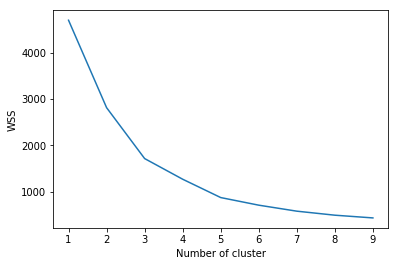

In [32]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=2,random_state=123456)
# Fitting the input data
kmeans = kmeans.fit(X_train)
# Getting the cluster labels
labels = kmeans.predict(X_train)
# Centroid values
centroids = kmeans.cluster_centers_

In [34]:
## Getting the cluster labels for the test Data set

In [35]:
labels_test_new= kmeans.predict(X_test)

In [36]:
labels_test_new

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [37]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [38]:
labels_test_new=pd.DataFrame(labels_test_new)

In [39]:
labels_test_new.shape

(900, 1)

In [40]:
indices=labels_test_new.sample(frac=0.9,random_state=1234).index
print(indices)

Int64Index([319, 560, 137, 609, 271, 427, 869, 770,  60, 709,
            ...
            574, 838, 434, 663, 334, 235, 311, 345, 103,  82],
           dtype='int64', length=810)


In [41]:
Alpha=labels_test_new.iloc[indices,:]

In [42]:
Alpha.shape

(810, 1)

In [43]:
kmeans = KMeans(n_clusters=2)
kmeans1=kmeans.fit(labels_test_new)
print(len(kmeans1.labels_))
labels_test_new['clus']=kmeans1.labels_

900


In [44]:
kmeans = KMeans(n_clusters=2)
kmeans2=kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['clus']=kmeans2.labels_

810


In [45]:
g1=labels_test_new.loc[indices,'clus']
g2=Alpha.clus


In [46]:
adjusted_rand_score(g1,g2)

1.0

- adjusted_rand_score computes a similarity measure between two clusterings by considering all pairs of samples 
- counting pairs that are assigned in the same or different clusters in the predicted and true clusterings 